# PART 1 : Rectangle intersect

This project aims at computing intersections of two rectangles

the final goal is to perform a 3d matching simulation

### Import libraries

In [1]:
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

### The rectangle and line classes

In [2]:
class rectangle(object):
    
    def __init__(self, length, width, lower_coordinates, angle=0):
        self.length = length
        self.width = width
        self.lower_coordinates = lower_coordinates
        self.angle = angle
        
    def __repr__(self):
        return {'length':self.length, 'width':self.width, 'lower_coordinates':self.lower_coordinates, 'angle':self.angle}

    def __str__(self):
        return 'rectangle(length='+str(self.length)+', width='+str(self.width)+', lower_coordinates='+str(self.lower_coordinates)+', angle='+str(self.angle)+ ')'
    
    def compute_coordinates(self):

        if self.angle == 0 :
            self.higher_coordinates = tuple([self.lower_coordinates[i] + j for (i,j) in enumerate([self.length, self.width])])
            self.x_low_y_high = tuple([self.lower_coordinates[i] + j for (i,j) in enumerate([0, self.width])])
            self.x_high_y_low = tuple([self.lower_coordinates[i] + j for (i,j) in enumerate([self.length, 0])])
            coords = [self.lower_coordinates, self.x_low_y_high, self.x_high_y_low, self.higher_coordinates]
            return(coords)
        else:
            self.res = []
            self.coordinates_gravity_center = self.gravity_center()
            for coor in coords:
                self.res.append(tuple([self.coordinates_gravity_center[0]+\
                            (coor[0]-self.coordinates_gravity_center[0])*np.cos(degre*np.pi/180) +\
                            np.sin(degre*np.pi/180)*(self.coordinates_gravity_center[1]-coor[1]),\
                            self.coordinates_gravity_center[1]+\
                            (self.coor[0]-self.coordinates_gravity_center[0])*np.sin(degre*np.pi/180) +\
                            np.cos(degre*np.pi/180)*(-self.coordinates_gravity_center[1]+coor[1])]))
            return(self.res)
    
    def gravity_center(self):
        self.coordinates = [(self.compute_coordinates[0][0]+self.compute_coordinates[-1][0])/2,\
                            (self.compute_coordinates[0][1]+self.compute_coordinates[-1][1])/2]
        return(tuple(self.coordinates))
        
#     def rotation_rectangle(self, degre):
#         self.coordinates_gravity_center = self.gravity_center()
#         self.re = self.coordinates_gravity_center[0]+(self.lower_coordinates[0]-self.coordinates_gravity_center[0])*np.cos(degre*np.pi/180) + np.sin(degre*np.pi/180)*(self.coordinates_gravity_center[1]-self.lower_coordinates[1])
#         self.im = self.coordinates_gravity_center[1]+(self.lower_coordinates[0]-self.coordinates_gravity_center[0])*np.sin(degre*np.pi/180) + np.cos(degre*np.pi/180)*(-self.coordinates_gravity_center[1]+self.lower_coordinates[1])
#         return((self.re, self.im))
    
    def draw_manually(self, color):
        plt.plot([self.lower_coordinates[0], self.lower_coordinates[0] + self.length],\
                 [self.lower_coordinates[1], self.lower_coordinates[1]],\
                 color = color)
        plt.plot([self.lower_coordinates[0] + self.length, self.lower_coordinates[0] + self.length],\
                 [self.lower_coordinates[1], self.lower_coordinates[1] + self.width],\
                 color = color)
        plt.plot([self.lower_coordinates[0] + self.length, self.lower_coordinates[0]],\
                 [self.lower_coordinates[1] + self.width, self.lower_coordinates[1] + self.width],\
                 color = color)
        plt.plot([self.lower_coordinates[0], self.lower_coordinates[0]],\
                 [self.lower_coordinates[1] + self.width, self.lower_coordinates[1]],\
                 color = color)

    def count_points_inside(self, rectangle_2):
        self.resu1 = 0
        self.resu2 = 0
        self.coordinates1 = self.compute_coordinates()
        self.coordinates2 = rectangle_2.compute_coordinates()
        for i in range(4):           
            if ((self.coordinates1[0][0] < self.coordinates2[i][0]) & (self.coordinates1[0][1] < self.coordinates2[i][1])) &\
            ((self.coordinates1[3][0] > self.coordinates2[i][0]) & (self.coordinates1[3][1] > self.coordinates2[i][1])):
                self.resu1 += 1
            if ((self.coordinates2[0][0] < self.coordinates1[i][0]) & (self.coordinates2[0][1] < self.coordinates1[i][1])) &\
            ((self.coordinates2[3][0] > self.coordinates1[i][0]) & (self.coordinates2[3][1] > self.coordinates1[i][1])):
                self.resu2 += 1
#         print(f'rectangle 1 has {self.resu1} point inside rect 2\nrectangle 2 has {self.resu2} point inside rect 1')
        return(self.resu1, self.resu2)
        
    def intersect(self, rectangle_2):
        
        self.coordinatess1 = self.compute_coordinates()
        self.coordinatess2 = rectangle_2.compute_coordinates()
        
        if self.count_points_inside(rectangle_2)[0] == 0:
            self.x = self.coordinatess1
            self.coordinatess1 = self.coordinatess2
            self.coordinatess2 = self.x
            del(self.x)
            
        if max(self.count_points_inside(rectangle_2)) == 4:
            print('no intersection')
            
        if max(self.count_points_inside(rectangle_2)) == 2:
            if self.coordinatess2[1][1] > self.coordinatess1[1][1]:
                return((self.coordinatess2[0][0] ,self.coordinatess1[1][1] ),(self.coordinatess2[2][0] ,self.coordinatess1[1][1] ))
            
            if self.coordinatess2[0][1] < self.coordinatess1[0][1]:
                return((self.coordinatess2[0][0] ,self.coordinatess1[0][1] ),(self.coordinatess2[2][0] ,self.coordinatess1[0][1] ))
            
            if self.coordinatess2[2][0] > self.coordinatess1[2][0]:
                return((self.coordinatess1[2][0] ,self.coordinatess2[0][1] ),(self.coordinatess1[2][0] ,self.coordinatess2[1][1] ))
            
            if self.coordinatess2[0][0] < self.coordinatess1[0][0]:
                return((self.coordinatess1[0][0] ,self.coordinatess2[0][1] ),(self.coordinatess1[0][0] ,self.coordinatess2[1][1] ))
            
        if max(self.count_points_inside(rectangle_2)) == 1:
            print('0')
            
        if max(self.count_points_inside(rectangle_2)) == 0:
            
            print('no intersection')

In [3]:
class line(object):
    
    def __init__(self, coord1, coord2):
        self.coord1 = coord1
        self.coord2 = coord2
        
    def __repr__(self):
        return {'coord1':self.coord1, 'coord2':self.coord2}

    def __str__(self):
        return 'line(coord1='+str(self.coord1)+', coord2='+str(self.coord2)+ ')'
    
    def eqn_line(self):
        
        '''
        return the cartesian equation of the line float*float : (slope, intersect)
        '''
        
        self.slope = (self.coord2[1]-self.coord1[1]) / (self.coord2[0] - self.coord1[0])
        self.intersect = self.coord2[1] - self.slope * self.coord2[0]
        
        return((np.round(self.slope,2), np.round(self.intersect,2)))

    def intersect_lines(self, line2):
        
        '''
        return the coordinates of the intersection of two lines float*float : (x,y)
        '''
        
        eqn2 = line2.eqn_line()
        if self.eqn_line()[0] == eqn2[0]:
            print('no intersect')
        else:
            self.x = np.round((eqn2[1] - self.eqn_line()[1]) / (self.eqn_line()[0] - eqn2[0]),2)
            self.y = np.round(eqn2[0] * self.x + eqn2[1],2)
            
            return((self.x,self.y))

### Simulation

In [4]:
rectan = rectangle(8,5,(1,1),0)
print(rectan.__str__())
rectan2= rectangle(11,7,(-1,2),0)
print(rectan2.__str__())

print(f'lower coordinates are: {rectan.lower_coordinates}')
print(f'all coordinates of rectan are: {rectan.compute_coordinates()}')
print(f'all coordinates of rectan are: {rectan2.compute_coordinates()}')

rectangle(length=8, width=5, lower_coordinates=(1, 1), angle=0)
rectangle(length=11, width=7, lower_coordinates=(-1, 2), angle=0)
lower coordinates are: (1, 1)
all coordinates of rectan are: [(1, 1), (1, 6), (9, 1), (9, 6)]
all coordinates of rectan are: [(-1, 2), (-1, 9), (10, 2), (10, 9)]


In [5]:
line1 = line((1,1),(9,9))
print(line1.__str__())
line2 = line((1,9),(9,1))
print(line2.__str__())

line(coord1=(1, 1), coord2=(9, 9))
line(coord1=(1, 9), coord2=(9, 1))


In [6]:
line1.eqn_line()

(1.0, 0.0)

In [7]:
line2.eqn_line()

(-1.0, 10.0)

In [8]:
line1.intersect_lines(line2)

(5.0, 5.0)

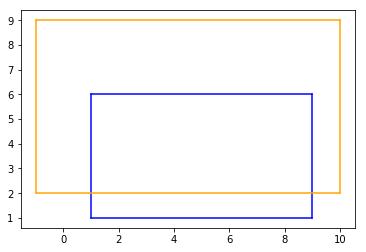

In [9]:
# draw rectangles
rectan.draw_manually('blue')
rectan2.draw_manually('orange')

In [10]:
coord_rectan = rectan.compute_coordinates()
coord_rectan2 = rectan2.compute_coordinates()

In [11]:
print(rectan.intersect(rectan2))
print(rectan.count_points_inside(rectan2))

((1, 2), (9, 2))
(0, 2)


In [12]:
print(rectan2.intersect(rectan))
print(rectan2.count_points_inside(rectan))

((1, 2), (9, 2))
(2, 0)


#### test condition 2 intersect

In [13]:
def test(rectan, rectan2):
    rectan.draw_manually('blue')
    rectan2.draw_manually('orange')
    print(rectan.intersect(rectan2)==rectan2.intersect(rectan))
    print(rectan.intersect(rectan2))

True
((4, 0), (6, 0))
True
((4, 0), (6, 0))
True
((5, 15), (7, 15))
True
((5, 15), (7, 15))
True
((0, 5), (0, 9))
True
((0, 5), (0, 9))
True
((10, 5), (10, 9))
True
((10, 5), (10, 9))


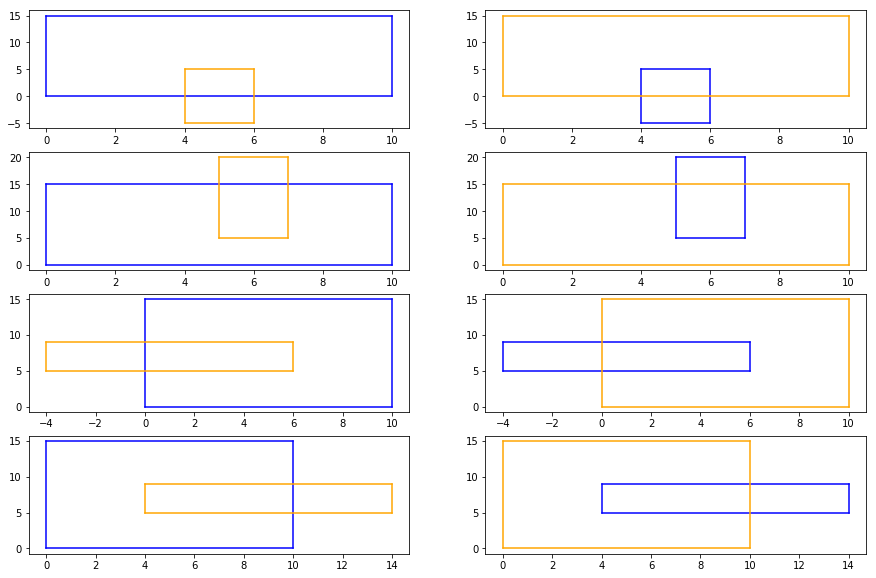

In [28]:
plt.figure(figsize=(15,12))
plt.subplot(4,2,1)
test(rectangle(10,15,(0,0),0),rectangle(2,10,(4,-5),0))
plt.subplot(4,2,2)
test(rectangle(2,10,(4,-5),0),rectangle(10,15,(0,0),0))
plt.subplot(4,2,3)
test(rectangle(10,15,(0,0),0),rectangle(2,15,(5,5),0))
plt.subplot(4,2,4)
test(rectangle(2,15,(5,5),0),rectangle(10,15,(0,0),0))
plt.subplot(4,2,5)
test(rectangle(10,15,(0,0),0),rectangle(10,4,(-4,5),0))
plt.subplot(4,2,6)
test(rectangle(10,4,(-4,5),0),rectangle(10,15,(0,0),0))
plt.subplot(4,2,7)
test(rectangle(10,15,(0,0),0),rectangle(10,4,(4,5),0))
plt.subplot(4,2,8)
test(rectangle(10,4,(4,5),0),rectangle(10,15,(0,0),0))